In [1]:
import pandas as pd

In [2]:
vul_data = pd.read_csv("./affected_packages_npm.csv",delimiter=",")

In [3]:
vul_data

,project_id,vul_project_id,vul_start_datetime,vul_end_datetime,vul_start_timestamp,vul_end_timestamp,compliantType,vul_start_dependency_compliant,vul_start_version,vul_deps
0,311142,177357,2015-02-17 12:02:16 +0000 UTC,2023-01-21 10:37:02.041269 +0900 JST m=+0.8165...,1424174536,1674265022,1,^2.5.0,2.6.0,0
1,606184,177357,2015-02-17 15:47:06 +0000 UTC,2023-01-21 10:37:02.071644 +0900 JST m=+0.8469...,1424188026,1674265022,1,^2.5.1,2.6.0,0
2,509282,177357,2015-02-13 22:49:41 +0000 UTC,2023-01-21 10:37:02.097428 +0900 JST m=+0.8726...,1423867781,1674265022,1,^2.2.0,2.6.0,0
3,268907,177357,2014-04-24 21:21:27 +0000 UTC,2023-01-21 10:37:02.17949 +0900 JST m=+0.95476...,1398374487,1674265022,3,1.4.4,1.4.4,0
4,160295,177357,2014-04-24 22:55:46 +0000 UTC,2023-01-21 10:37:02.375402 +0900 JST m=+1.1506...,1398380146,1674265022,1,^1.4.6,1.4.7,0
...,...,...,...,...,...,...,...,...,...,...
61548,4756740,1150354,2019-12-19 14:54:16 +0000 UTC,2023-01-21 11:40:16.413071 +0900 JST m=+3795.3...,1576767256,1674268816,1,^4.6.2,4.6.2,0
61549,4382559,1150354,2019-12-21 07:41:51 +0000 UTC,2023-01-21 11:40:16.413968 +0900 JST m=+3795.3...,1576914111,1674268816,1,^4.6.2,4.6.2,0
61550,1007495,1150354,2019-12-28 15:44:07 +0000 UTC,2023-01-21 11:40:16.414835 +0900 JST m=+3795.3...,1577547847,1674268816,1,^4.6.2,4.6.2,0
61551,3689791,1150354,2020-01-08 10:41:35 +0000 UTC,2023-01-21 11:40:16.41583 +0900 JST m=+3795.37...,1578480095,1674268816,1,^4.6.2,4.6.2,0


In [4]:
vul_data["vul_months"] = (vul_data["vul_end_timestamp"] - vul_data["vul_start_timestamp"]) / (3600 * 24 * 30)

In [5]:
vul_data

,project_id,vul_project_id,vul_start_datetime,vul_end_datetime,vul_start_timestamp,vul_end_timestamp,compliantType,vul_start_dependency_compliant,vul_start_version,vul_deps,vul_months
0,311142,177357,2015-02-17 12:02:16 +0000 UTC,2023-01-21 10:37:02.041269 +0900 JST m=+0.8165...,1424174536,1674265022,1,^2.5.0,2.6.0,0,96.485527
1,606184,177357,2015-02-17 15:47:06 +0000 UTC,2023-01-21 10:37:02.071644 +0900 JST m=+0.8469...,1424188026,1674265022,1,^2.5.1,2.6.0,0,96.480323
2,509282,177357,2015-02-13 22:49:41 +0000 UTC,2023-01-21 10:37:02.097428 +0900 JST m=+0.8726...,1423867781,1674265022,1,^2.2.0,2.6.0,0,96.603874
3,268907,177357,2014-04-24 21:21:27 +0000 UTC,2023-01-21 10:37:02.17949 +0900 JST m=+0.95476...,1398374487,1674265022,3,1.4.4,1.4.4,0,106.439250
4,160295,177357,2014-04-24 22:55:46 +0000 UTC,2023-01-21 10:37:02.375402 +0900 JST m=+1.1506...,1398380146,1674265022,1,^1.4.6,1.4.7,0,106.437066
...,...,...,...,...,...,...,...,...,...,...,...
61548,4756740,1150354,2019-12-19 14:54:16 +0000 UTC,2023-01-21 11:40:16.413071 +0900 JST m=+3795.3...,1576767256,1674268816,1,^4.6.2,4.6.2,0,37.616343
61549,4382559,1150354,2019-12-21 07:41:51 +0000 UTC,2023-01-21 11:40:16.413968 +0900 JST m=+3795.3...,1576914111,1674268816,1,^4.6.2,4.6.2,0,37.559686
61550,1007495,1150354,2019-12-28 15:44:07 +0000 UTC,2023-01-21 11:40:16.414835 +0900 JST m=+3795.3...,1577547847,1674268816,1,^4.6.2,4.6.2,0,37.315189
61551,3689791,1150354,2020-01-08 10:41:35 +0000 UTC,2023-01-21 11:40:16.41583 +0900 JST m=+3795.37...,1578480095,1674268816,1,^4.6.2,4.6.2,0,36.955525


<AxesSubplot: >

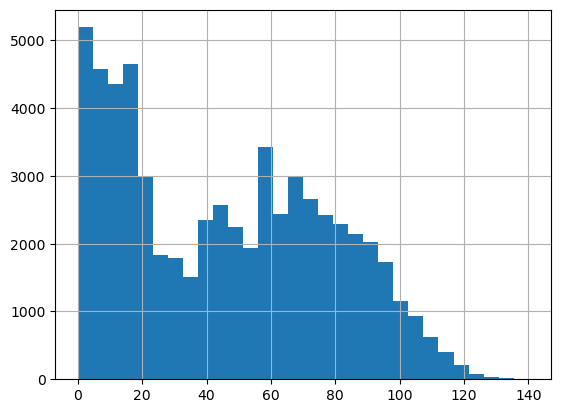

In [6]:
vul_data["vul_months"].hist(bins=30)

In [7]:
vul_data.groupby("compliantType").size()

compliantType
1    47457
2     4352
3     9744
dtype: int64

# サバイバル分析

In [8]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

In [12]:
vul_data_compliant = vul_data[vul_data["compliantType"] == 1]
vul_data_permissive = vul_data[vul_data["compliantType"] == 2]
vul_data_restrictive = vul_data[vul_data["compliantType"] == 3]

In [9]:
status = vul_data["vul_end_timestamp"] < 1674091000

In [10]:
status

0        False
1        False
2        False
3        False
4        False
         ...  
61548    False
61549    False
61550    False
61551    False
61552    False
Name: vul_end_timestamp, Length: 61553, dtype: bool

Text(0.5, 0, 'time $t$')

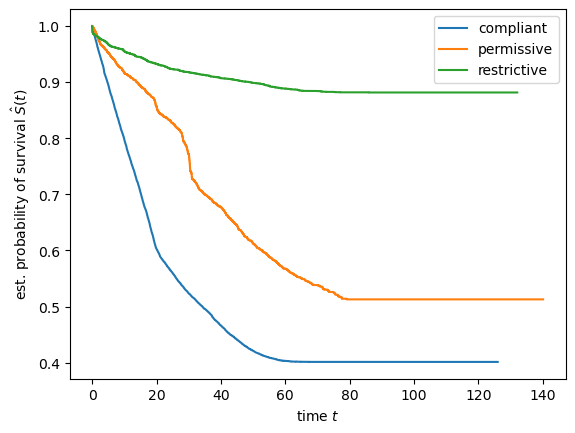

In [16]:
time_compliant, survival_prob_compliant = kaplan_meier_estimator(vul_data_compliant["vul_end_timestamp"] < 1674091000, vul_data_compliant["vul_months"])
time_permissive, survival_prob_permissive = kaplan_meier_estimator(vul_data_permissive["vul_end_timestamp"] < 1674091000, vul_data_permissive["vul_months"])
time_restrictive, survival_prob_restrictive = kaplan_meier_estimator(vul_data_restrictive["vul_end_timestamp"] < 1674091000, vul_data_restrictive["vul_months"])

plt.step(time_compliant, survival_prob_compliant, where="post", label="compliant")
plt.step(time_permissive, survival_prob_permissive, where="post", label="permissive")
plt.step(time_restrictive, survival_prob_restrictive, where="post", label="restrictive")

plt.legend()

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

# memo

- permissiveがcompliantより生存しているのはなぜ
